# Analysis of Highest IT Paying Jobs in India

In [3]:
import pandas as pd
import numpy as np 

df = pd.read_csv("position_salary.csv", encoding='ISO-8859-1')

In [88]:
df.head()

,Position,Location,Gender,Education,Experience (Years),Salary,Experience Level
0,QNXT Configuration QA/Testing SME,Ghaziabad,Female,B.Tech/B.E.,11,2014510,8+ years
1,Provider Data Management,New Delhi,Female,B.Tech/B.E.,24,1624349,8+ years
2,Accessibility Engineer QA,Noida,Female,BCA,25,1926223,8+ years
3,Senior Software Engineer,Jalandhar,Male,Mtech,27,2403560,8+ years
4,Java Developer/Spring Boot,Meerut,Male,B.A,11,1128404,8+ years


In [5]:
print(df.columns)

Index(['Position', 'Location', 'Gender', 'Education', 'Experience (Years)',
       'Salary'],
      dtype='object')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3467 entries, 0 to 3466
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Position            3448 non-null   object
 1   Location            3467 non-null   object
 2   Gender              3443 non-null   object
 3   Education           3391 non-null   object
 4   Experience (Years)  3467 non-null   int64 
 5   Salary              3467 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 162.6+ KB


In [7]:
df.describe()

,Experience (Years),Salary
count,3467.000000,3.467000e+03
mean,16.639746,1.487459e+06
std,6.935259,5.776934e+05
min,5.000000,5.026890e+05
25%,11.000000,9.818155e+05
50%,17.000000,1.475343e+06
75%,23.000000,1.985568e+06
max,28.000000,2.499925e+06


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.isnull().sum()

Position              19
Location               0
Gender                24
Education             76
Experience (Years)     0
Salary                 0
dtype: int64

## Imputation Ideas for Missing Values

### Handling Missing Values from Education Column

In [12]:
distinct_education = df['Education'].dropna().unique()
print("Distinct values in the Education:", distinct_education)

Distinct values in the Education: ['B.Tech/B.E.' 'BCA' 'B.A' 'B.Com' 'Diploma' 'B.Sc' 'B.B.A/ B.M.S'
 'Not Pursuing Graduation' 'BJMC' 'course on computer concepts' 'B.Des.'
 'LLB' 'BBA' 'BTECH' 'HSC' 'bachelor of arts' 'B.PHARMACY' 'B.Pharma'
 'BBM' 'Mtech']


In [13]:
# Define ranges
def fill_education(row):
    if pd.isnull(row['Education']):
        if row['Experience (Years)'] <= 2 or row['Salary'] <= 500000:
            return 'B.Tech/B.E.'
        elif 3 <= row['Experience (Years)'] <= 6 or 500000 < row['Salary'] <= 1000000:
            return 'BCA'
        else:
            return 'Mtech'
    return row['Education']

# Apply the function to fill missing values
df['Education'] = df.apply(fill_education, axis=1)

print("Data after imputing Education column:")
print(df)

Data after imputing Education column:
                               Position   Location  Gender    Education  \
0     QNXT Configuration QA/Testing SME  Ghaziabad  Female  B.Tech/B.E.   
1              Provider Data Management  New Delhi  Female  B.Tech/B.E.   
2             Accessibility Engineer QA      Noida  Female          BCA   
3              Senior Software Engineer  Jalandhar    Male        Mtech   
4            Java Developer/Spring Boot     Meerut    Male          B.A   
...                                 ...        ...     ...          ...   
3462               Salesforce developer  Hyderabad    Male  B.Tech/B.E.   
3463               Salesforce developer  Bengaluru    Male          BCA   
3464               Salesforce developer  New Delhi  Female        Mtech   
3465               Salesforce developer   Gurugram    Male          B.A   
3466               Salesforce developer       Pune    Male        B.Com   

      Experience (Years)   Salary  
0                     11 

### Handling Missing Values from Gender Column

In [16]:
# Fill missing gender values with mode
gender_mode = df['Gender'].mode()[0]
df['Gender'].fillna(gender_mode)

0       Female
1       Female
2       Female
3         Male
4         Male
         ...  
3462      Male
3463      Male
3464    Female
3465      Male
3466      Male
Name: Gender, Length: 3467, dtype: object

### Handling Missing Values from Position Column

In [23]:
# Filter rows where Position is null
null_position_rows = df[df['Position'].isnull()]
print(null_position_rows)

     Position                        Location  Gender    Education  \
102       NaN                          Mumbai    Male          BCA   
815       NaN                            Pune  Female  B.Tech/B.E.   
1703      NaN                           Noida  Female  B.Tech/B.E.   
1845      NaN                            Pune    Male      Diploma   
1897      NaN  vishakapatnam - Andhra Pradesh    Male          B.A   
1989      NaN                        Gurugram  Female  B.Tech/B.E.   
2011      NaN                        Gurugram    Male        B.Com   
2812      NaN                       New Delhi  Female          B.A   
2824      NaN                           Noida  Female          BCA   
2880      NaN                       New Delhi    Male          BCA   
2883      NaN                       New Delhi  Female         B.Sc   
2888      NaN                       New Delhi    Male         B.Sc   
2891      NaN                       New Delhi    Male        B.Com   
2893      NaN       

In [30]:
# Drop rows where the Position column has NaN values
df_cleaned = df.dropna(subset=['Position'])

print("Dataset after dropping rows with NaN in the Position column:")
print(df_cleaned)


Dataset after dropping rows with NaN in the Position column:
                               Position   Location  Gender    Education  \
0     QNXT Configuration QA/Testing SME  Ghaziabad  Female  B.Tech/B.E.   
1              Provider Data Management  New Delhi  Female  B.Tech/B.E.   
2             Accessibility Engineer QA      Noida  Female          BCA   
3              Senior Software Engineer  Jalandhar    Male        Mtech   
4            Java Developer/Spring Boot     Meerut    Male          B.A   
...                                 ...        ...     ...          ...   
3462               Salesforce developer  Hyderabad    Male  B.Tech/B.E.   
3463               Salesforce developer  Bengaluru    Male          BCA   
3464               Salesforce developer  New Delhi  Female        Mtech   
3465               Salesforce developer   Gurugram    Male          B.A   
3466               Salesforce developer       Pune    Male        B.Com   

      Experience (Years)   Salary  
0 

In [33]:
# Replace empty strings or spaces with NaN
df['Position'] = df['Position'].replace(['', ' '], pd.NA)

In [34]:
# Drop rows where Position is NaN
df = df.dropna(subset=['Position'])

# Verify if NaN values are removed
print(df.isnull().sum())

Position              0
Location              0
Gender                0
Education             0
Experience (Years)    0
Salary                0
dtype: int64


## Basic-Level Questions
- How many unique job positions are listed in the dataset?
- What is the average salary of IT jobs in India?
- Which location has the highest number of job positions listed?

In [45]:
# Count how many unique job positions are in the dataset
total_jobs = len(df["Position"].unique())

print("Total unique job positions in the dataset:",total_jobs)

Total unique job positions in the dataset: 808


In [40]:
distinct_jobs= df['Position'].unique()
distinct_jobs_sorted = sorted(distinct_jobs)
# Print each unique job position separately
for job in distinct_jobs:
    print(job)

(JAVA/J2EE).
.Net /JavaScript
.Net Architect
.Net Developer
.Net Developer  
.Net Lead/Angular, JavaScript
AML
AML Triage Analyst
ANDROID
API Connect
API integration Apigee
API, C#, Selenium Testing
AWS
AWS Architect
AWS Architect - (All cloud)
AWS CLOUD
AWS CLOUD &amp; DEVOPS ENGINEER
AWS Cloud Architect
AWS Cloud Engineer
AWS Data Engineer
AWS Databricks
AWS Solution Architect
AWS Solution Architect|AWS Data Architect
AWS databricks
AWS solution Architect
AWS/Devops
AZURE VIRTUVAL
Ab Initio Developer
Ab initio
Ab intio
Abinitio Lead
Accessibility Engineer QA
Account Manager
Account Manager/ HealthCare(Payer/Provider)
Accounting
Advance Maths Teacher
Agile project manager
Android Developer
Android Developer and Java
Android Mobile and IOS App Developer
Android Tester
Apache Druid
Application Support- Oracle,SQL
Application/ Product
Asset Managemen, Senior Business Analyst
Associate Lead Analys
Automation &Functional Testing
Automation Anywhere, Document Automation, IQ BOT and AARI, Po

In [47]:
# What is the average salary of IT jobs in India?
Avg_salary = df["Salary"].mean()
print("Average salary of IT jobs in India",Avg_salary)

Average salary of IT jobs in India 1488095.2665313226


In [50]:
#location which has the highest number of job positions listed?
# Count the number of job positions by location
location_counts = df.groupby('Location')['Position'].count()

# Find the location with the highest number of job positions
location_with_max_positions = location_counts.idxmax()
max_position_count = location_counts.max()

print("The location with the highest number of job positions is", location_with_max_positions ,"with", max_position_count,"job positions.")

The location with the highest number of job positions is New Delhi with 689 job positions.


# Intermediate-Level Questions
- Calculate the mean, median, and mode of the salaries in the dataset. Which measure (mean, median, or mode) best represents the central tendency of the salaries?
- Find the range and interquartile range (IQR) of the Experience (Years) in the dataset. How do these values help in understanding the spread of experience across the employees?
- Calculate the variance and standard deviation for the salaries of employees with different levels of education (e.g., Bachelor's, Master's, Ph.D.). What does the standard deviation indicate about the spread of salaries within each education group?
- Determine the correlation between experience (years) and salary. Is there a positive, negative, or no correlation between these variables?
- Plot the distribution of salaries. Is the distribution positively or negatively skewed? What does this indicate about the salary structure in the IT industry in India?
- What is the median salary based on different levels of experience (e.g., 0-3 years, 4-7 years, 8+ years)?

In [87]:
# Calculate the mean, median, and mode of the salaries
mean_salary = df["Salary"].mean()
median_salary = df["Salary"].median()
mode_salary = df["Salary"].mode()

# If there are multiple modes, print the first one
print("The Mean of Salary is", mean_salary)
print("The Median of Salary is", median_salary)
print("The Mode of Salary is", mode_salary.iloc[0] if not mode_salary.empty else "No mode")

The Mean of Salary is 1488095.2665313226
The Median of Salary is 1475379.5
The Mode of Salary is 1199944


In [80]:
# Find the range and interquartile range (IQR) of the Experience (Years) 
# formula of range = max - min
experience_range = df['Experience (Years)'].max() - df['Experience (Years)'].min()

# Calculate IQR
# formula of IQR = Q3−Q1
Q1 = df['Experience (Years)'].quantile(0.25)
Q3 = df['Experience (Years)'].quantile(0.75)
IQR = Q3 - Q1

print("Range:",experience_range)
print("Interquartile Range (IQR)",IQR)

Range: 23
Interquartile Range (IQR) 12.0


- **Range**: 23  
  This means that the difference between the maximum and minimum years of experience in your dataset is 23 years. This indicates a wide spread in the experience levels of the employees in the dataset.

- **Interquartile Range (IQR)**: 12.0  
  The IQR represents the spread of the middle 50% of the experience values. With an IQR of 12.0, this suggests that the central 50% of the data has a range of 12 years, showing that the majority of the employees have experience levels within this range.

### **Interpretation**:
- **Range**: A range of 23 years indicates significant variation in the experience levels, which could suggest the presence of both entry-level and highly experienced employees in the dataset.
- **IQR**: The IQR of 12 years means that the bulk of employees' experience levels fall within a 12-year span, with the middle 50% having years of experience between Q1 and Q3. If the IQR is relatively large compared to the range, it may indicate a higher concentration of data points around the median.

In [64]:
print(df.columns)

Index(['Position', 'Location', 'Gender', 'Education', 'Experience (Years)',
       'Salary', 'Experience Level'],
      dtype='object')


In [77]:
#  variance and standard deviation for the salaries of employees with different levels of education (e.g., Bachelor's, Master's, Ph.D.)
education_stats = df.groupby('Education')['Salary'].agg(['var', 'std'])
print(education_stats)

                                      var            std
Education                                               
B.A                          3.311335e+11  575442.040646
B.B.A/ B.M.S                 3.614730e+11  601226.277355
B.Com                        3.006492e+11  548314.860649
B.Des.                       1.276928e+11  357341.349411
B.PHARMACY                   4.152628e+10  203779.980119
B.Pharma                     5.734843e+11  757287.455563
B.Sc                         3.479009e+11  589831.211732
B.Tech/B.E.                  3.308602e+11  575204.505047
BBA                          3.436439e+11  586211.483286
BBM                          2.295791e+11  479144.144862
BCA                          3.601868e+11  600155.652126
BJMC                         3.292398e+11  573794.240395
BTECH                        3.887524e+11  623500.117453
Diploma                      3.537124e+11  594737.227114
HSC                          2.140471e+11  462652.223480
LLB                          2.

The variance and standard deviation for the salaries of employees with different education levels provide insights into the spread of salaries within each education category. Here's how you can interpret the results based on the data you provided:

### **Interpretation of Variance and Standard Deviation**:

1. **Variance** (var):
   - The **variance** represents how much the salary data deviates from the average salary for each education level. Higher variance indicates a larger spread of salaries, meaning there are significant differences in the salaries within that education level.
   - For example, **Bachelor of Arts** (B.A) has the highest variance (`3.311335e+11`), indicating a wide range of salaries for people with this degree.
   - On the other hand, **Not Pursuing Graduation** has the lowest variance (`6.170065e+10`), suggesting that the salaries for this group are more concentrated around the average.

2. **Standard Deviation** (std):
   - The **standard deviation** is the square root of variance and provides a more interpretable measure of spread because it is in the same units as the data (salary in this case).
   - A higher standard deviation means that the salaries in that education category are more spread out from the mean. For instance, **Bachelor of Arts** (B.A) has the highest standard deviation (`575,442`), meaning there is a wider range of salaries.
   - Conversely, **Not Pursuing Graduation** has the lowest standard deviation (`248,396`), meaning the salaries in this category are closer to the average.

### **Key Observations**:
- **Bachelor of Arts (B.A)** has the highest variance and standard deviation, meaning this group has a wide spread of salaries, indicating that some employees with this degree earn significantly more than others.
- **B.PHARMACY** has the lowest variance (`4.152628e+10`) and standard deviation (`203,779`), suggesting that salaries within this education level are more consistent.
- **Mtech** and **BTech/B.E.** both have moderate variance and standard deviation, indicating that while salaries within these categories vary, the range is not as wide as in other categories like **B.A**.

### **Conclusion**:
- A high **variance** and **standard deviation** suggest greater salary disparity, which could be due to differences in industries, experience, or roles within that education category.
- A low **variance** and **standard deviation** indicate more uniform salaries within that education level, suggesting fewer extreme differences between individuals' earnings.


In [72]:
#correlation between experience (years) and salary.
correlation = df['Experience (Years)'].corr(df['Salary'])

print("Correlation between Experience (Years) and Salary:",correlation)

Correlation between Experience (Years) and Salary: 0.0334711725876096


### Interpretation:
- A correlation near **0** (like 0.033) implies that experience and salary are not strongly related in your data.
- The weak positive correlation means there is a slight tendency for salary to increase as experience increases, but it's not a strong or consistent trend.

If you're interested in understanding why this might be the case, it could be due to various factors such as:
- The distribution of experience in your dataset (e.g., if most data points are concentrated in a small range of experience years).
- Other factors influencing salary more significantly, such as education, location, or job position.

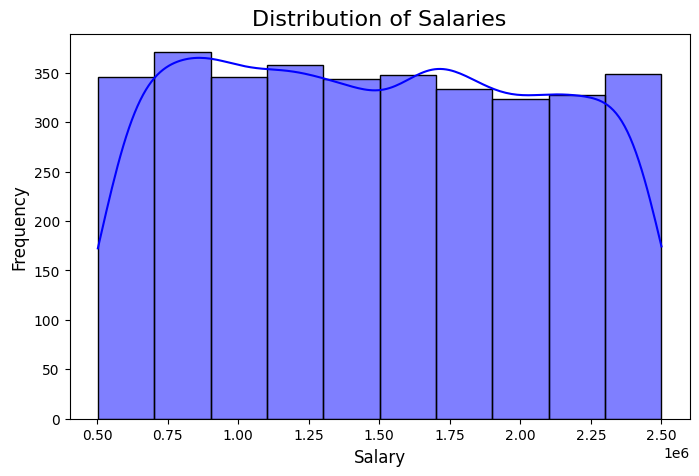

In [69]:
#Plot the distribution of salaries. Is the distribution positively or negatively skewed?
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of salaries
plt.figure(figsize=(8, 5))
sns.histplot(df['Salary'], kde=True, bins=10, color='blue')

# Adding labels and title
plt.title('Distribution of Salaries', fontsize=16)
plt.xlabel('Salary', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()

### Key Insights:
#### Histogram Bars:
- The bars show the frequency of salaries in specific salary ranges. The height of each bar represents how many data points (salaries) fall within each salary range.

#### KDE Curve: 
- The blue curve represents the estimated probability density of the data, essentially smoothing the distribution. It shows where the data points are concentrated and can be helpful in understanding the overall shape of the data distribution.

#### Interpretation:
 - If the KDE curve shows a peak towards the left and tails off towards the right, the distribution is positively skewed (i.e., most salaries are on the lower end, with a few high salaries pulling the mean to the right).
 - If the KDE curve has a peak towards the right and tails off towards the left, it would be negatively skewed.
 - Looking at the chart, if the peak is toward the left and the distribution has a tail on the right, it suggests a positive skew (higher salaries are less frequent). This indicates that most people in the dataset earn lower salaries, with fewer people earning much higher salaries

In [52]:
#Median Salary based on different Levels of experience
#lets check the median of salary 
median_salary = df["Salary"].median()
print(median_salary)

1475379.5


In [60]:
# Categorizing Experience into bins
bins = [0, 3, 7, float('inf')]
labels = ['0-3 years', '4-7 years', '8+ years']
df['Experience Level'] = pd.cut(df['Experience (Years)'], bins=bins, labels=labels, right=False)

# Calculating median salary by experience level
median_salary_by_experience = df.groupby('Experience Level')['Salary'].median()
print(median_salary_by_experience)

Experience Level
0-3 years          NaN
4-7 years    1472721.0
8+ years     1475787.0
Name: Salary, dtype: float64


C:\Users\khush\AppData\Local\Temp\ipykernel_27352\2359489008.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Experience Level'] = pd.cut(df['Experience (Years)'], bins=bins, labels=labels, right=False)
C:\Users\khush\AppData\Local\Temp\ipykernel_27352\2359489008.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_salary_by_experience = df.groupby('Experience Level')['Salary'].median()
